# **Final Report: Exploring Housing Prices**

### **By Yeojun Han, Jay Hou, Lavanya Kandhari, & Lillian Milroy**

## Introduction

Some of the most expensive real estate in the world is located on the California coast.[1] Over the last
several decades, it has become evident that rising sea levels, climate change, and coastal erosion threaten
the economic and physical stability of coastal properties.[2,3,4] Research reported by the California
Legislative Analyst’s Office states that “over $150 billion of property equating to more than 6% of the
state’s GDP and 600,000 people could be impacted by dynamic flooding by 2100”.[2,3]

There is disagreement among scientists, government organizations, and coastal residents about how to
address the situation without sacrificing the value of at-risk properties.[1] Continued study of the
relationship between property value and coastline proximity will be a useful way to gauge the efficacy of
whatever measures are implemented, as well as public sentiment.

We are working with data originally collected from the 1990 California census. It has 20640 rows, spanning the variables longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, and ocean_proximity.[5] Each row in the dataset represents a census block group. A block is a group of 300 to 6,000 people, the smallest geographical unit utilized by the U.S. Census Bureau.[6]

Was the median value of houses in close proximity to the ocean greater than the median value of houses further inland? We will address this question at a 95% significance level using the random variable median_house_value, and the classes “<1H OCEAN” and “INLAND” from the categorical variable ocean proximity:<br><br>
$H_0: \mu (\$<1H ocean) - \mu (\$ inland) = 0 $<br>
$H_a: \mu (\$<1H ocean) - \mu (\$ inland) > 0 $<br><br>
We hope to establish whether or not ocean proximity had an effect on home value in 1990, by
comparing samples of median home prices of inland houses and houses less than one hour away from the ocean. Our null hypothesis is that ocean proximity did not have an affect on house value, and our alternative hypothesis is that houses in closer proximity to the ocean had a greater house value in 1990.

There are extreme values present in this data, so to mitigate their impact on our results, median and IQR will be used as parameters.

## Preliminary Results & Exploratory Data Analysis


In [201]:
library(tidyverse)
library(broom)
library(infer)

housing <- read_csv("housing.csv")
head(housing)

Rows: 20640 Columns: 10
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): ocean_proximity
dbl (9): longitude, latitude, housing_median_age, total_rooms, total_bedroom...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


When we plot the median house value by ocean proximity, we can see that the `INLAND` house values tend to be cheaper, whereas `<1H OCEAN` house values tend to be more expensive.

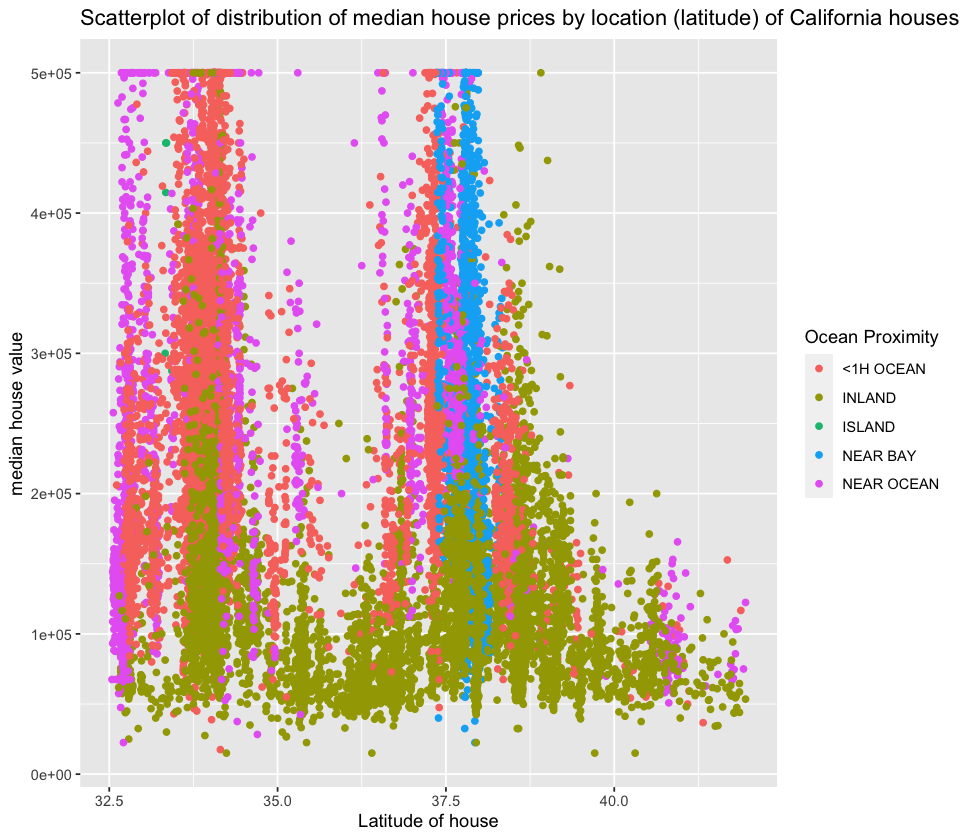

In [202]:
ggplot(housing, aes(x=latitude, y=median_house_value, color=ocean_proximity)) + 
    geom_point()+ggtitle("Scatterplot of distribution of median house prices by location (latitude) of California houses") + 
    xlab("Latitude of house") + 
    ylab("median house value")+
    labs(colour = "Ocean Proximity")

#### Fig. 1 Scatterplot of distribution of median house prices by location (latitude) of California houses

We can take a deeper look into the difference in median housing prices between inland houses and other houses in California. In this boxplot, we can see that that the inland house value seems much lower than the ones closer to the ocean.

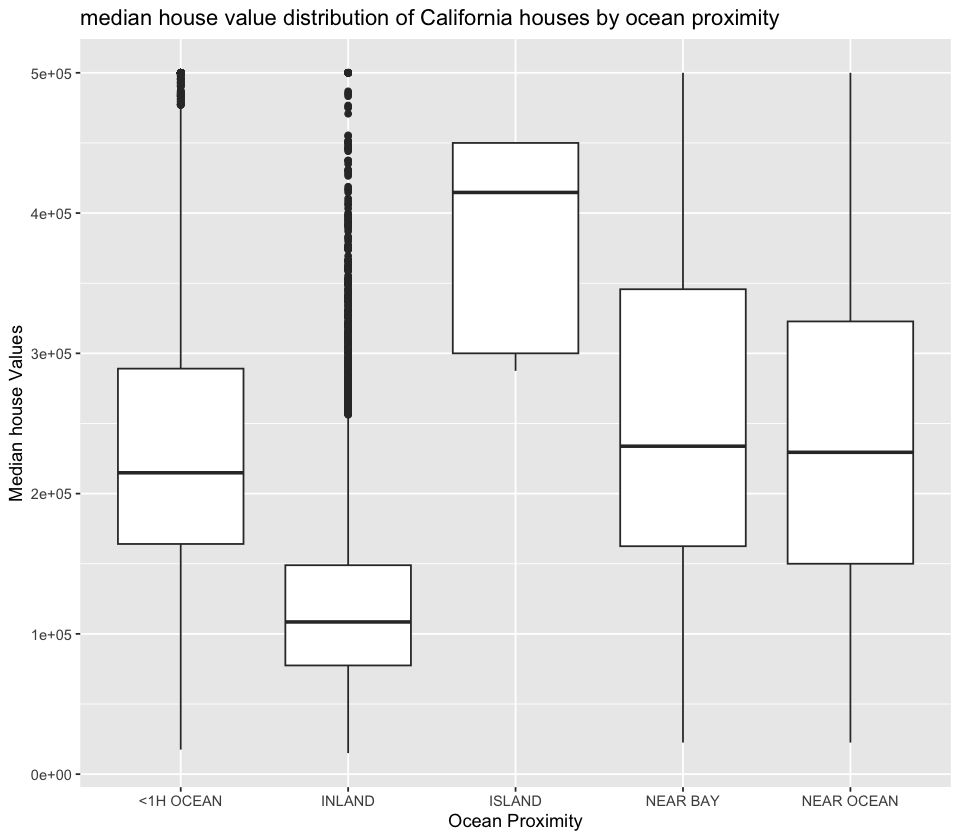

In [203]:
ggplot(housing, aes(x=ocean_proximity, y=median_house_value)) + 
    geom_boxplot()+ggtitle("median house value distribution of California houses by ocean proximity") + 
    xlab("Ocean Proximity") + 
    ylab("Median house Values")

#### Fig. 2 Median House Value Distribution of California Houses by Ocean Pmedian house value distribution of California houses by ocean proximity

If we want to compare the median housing price between inland California houses and some other group in `ocean_proximity`, we want to choose ones that have a relatively large number since it will help in decreasing the variance of our sample distribution. When we plot the number of observations in each group, we can see that the `<1H OCEAN` and `INLAND` have very high number of observations compared to the other groups. So, it would be a good idea to focus our project in comparing the median housing price between these two groups.

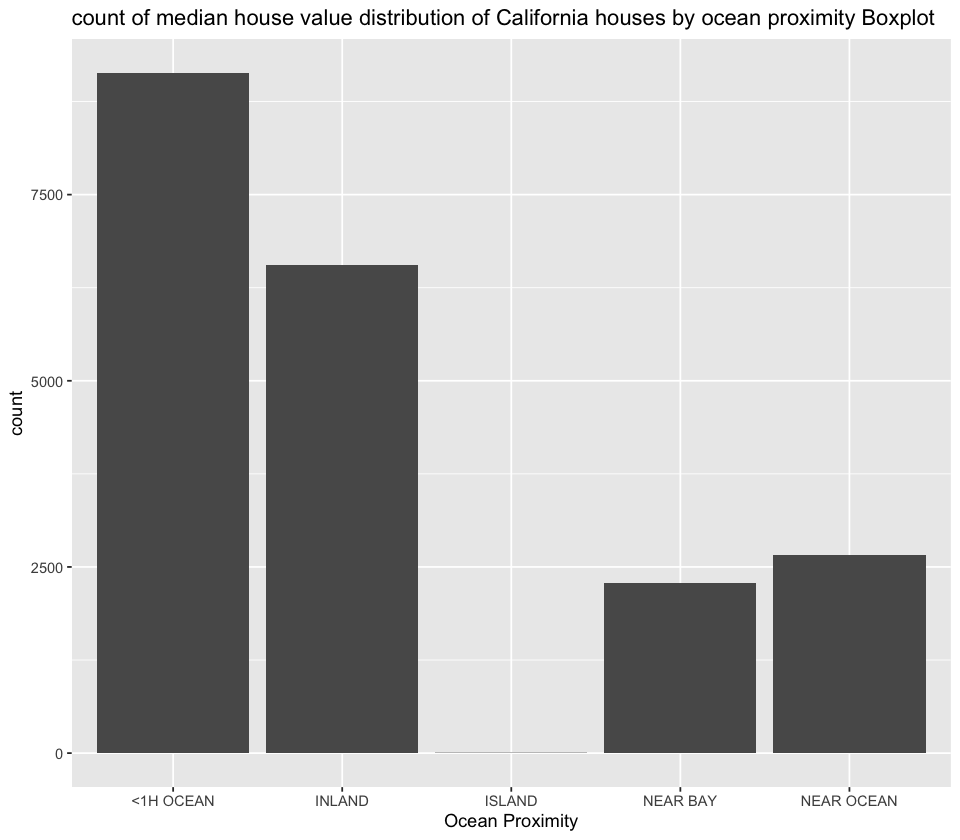

In [204]:
ggplot(housing, aes(x=ocean_proximity)) + 
    geom_bar()+
    ggtitle("count of median house value distribution of California houses by ocean proximity Boxplot") + 
    xlab("Ocean Proximity") + 
    ylab("count")

#### Fig. 3 Count of median house value distribution of California houses by ocean proximity Boxplot

Additionally, we should see whether `<1H OCEAN` and `INLAND` are roughly normally distributed. We know that both groups have at least 6500 samples so we have a large enough sample size, and the population of California is roughly 39 million, so we can be assured that our sample is less than 10% of the population. 

In [205]:
ocean <- housing %>% 
    filter(ocean_proximity == "<1H OCEAN")
inland <- housing %>% 
    filter(ocean_proximity == "INLAND")

nrow(ocean)
nrow(inland)

[1] 9136

[1] 6551

In [206]:
# create a dataset that only has two columns: median_house_value and ocean_proximity 
# filter ocean_proximity column to only have <1H ocean and inland, remove any NA 
# values from the dataset

housing_filtered <- housing %>% 
    filter(ocean_proximity %in% c("<1H OCEAN", "INLAND"))%>%
    select(median_house_value,ocean_proximity) %>% 
    filter(!is.na(median_house_value))

# summary of data
housing_filtered_summary <- 
    housing_filtered %>% 
    filter(!is.na(median_house_value)) %>% 
    group_by(ocean_proximity) %>% 
    summarise(sample_mean = mean(median_house_value), 
              sample_median = median(median_house_value),
              sample_sd = sd(median_house_value),
              IQR = IQR(median_house_value),
              n=n())
housing_filtered_summary
summary(housing_filtered)

ocean_proximity,sample_mean,sample_median,sample_sd,IQR,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
<1H OCEAN,240084.3,214850,106124.29,125000,9136
INLAND,124805.4,108500,70007.91,71450,6551


 median_house_value ocean_proximity   
 Min.   : 14999     Length:15687      
 1st Qu.:111300     Class :character  
 Median :166900     Mode  :character  
 Mean   :191943                       
 3rd Qu.:241100                       
 Max.   :500001                       

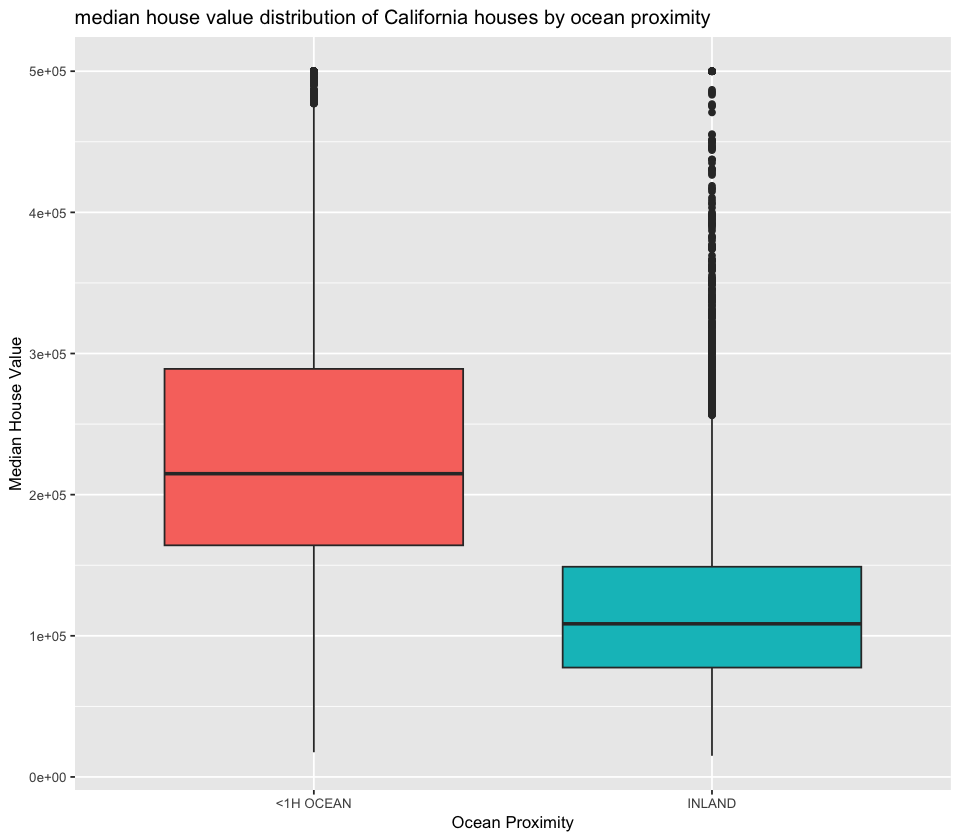

In [207]:
# plot the distribution for both classes
ocean_proximity_boxplots <-
    housing_filtered %>% 
    ggplot() +
    geom_boxplot(aes(x=ocean_proximity, y=median_house_value, fill = ocean_proximity)) +
    theme(text = element_text(size = 10)) +
    ggtitle("median house value distribution of California houses by ocean proximity") + 
    xlab("Ocean Proximity") + 
    ylab("Median House Value") + 
    guides(fill = FALSE)
ocean_proximity_boxplots

#### Fig 3. median house value distribution of California houses by ocean proximity

## Comparing the Means of Median California House Values
The California housing dataset contains the census of the median house values by region (`<1H OCEAN`, `INLAND`), which we will consider as two `independent` populations. So, we will perform 1000 samples of size 100 to create a sampling distribution and perform a `two-sample t-test`. 

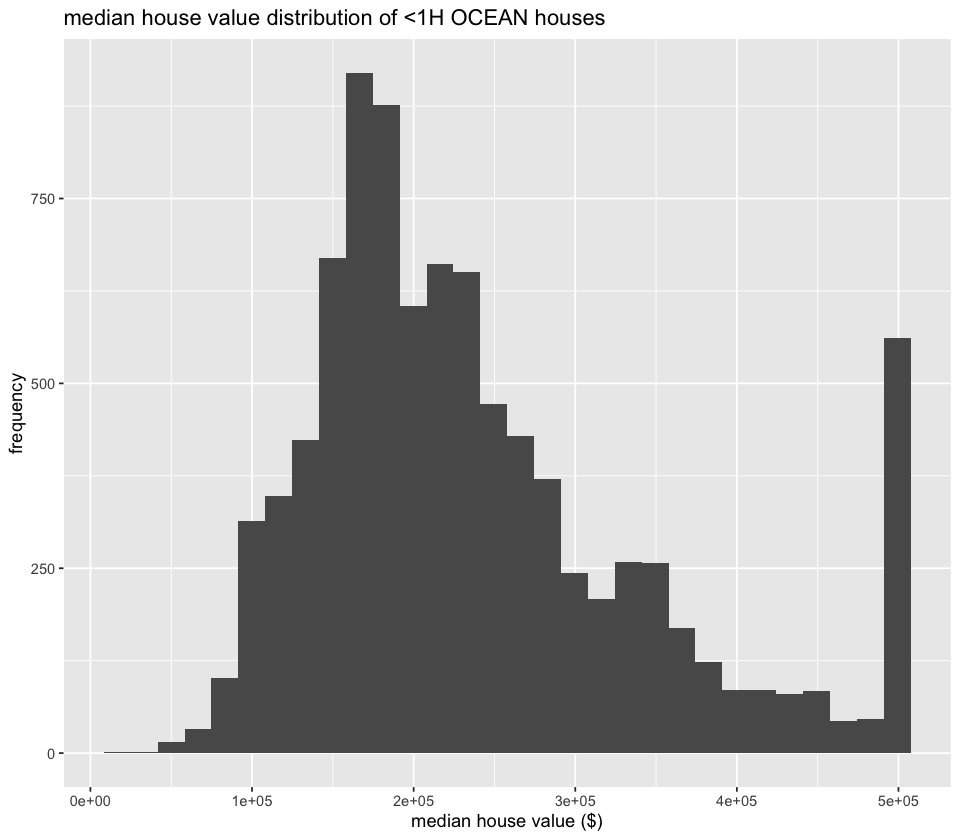

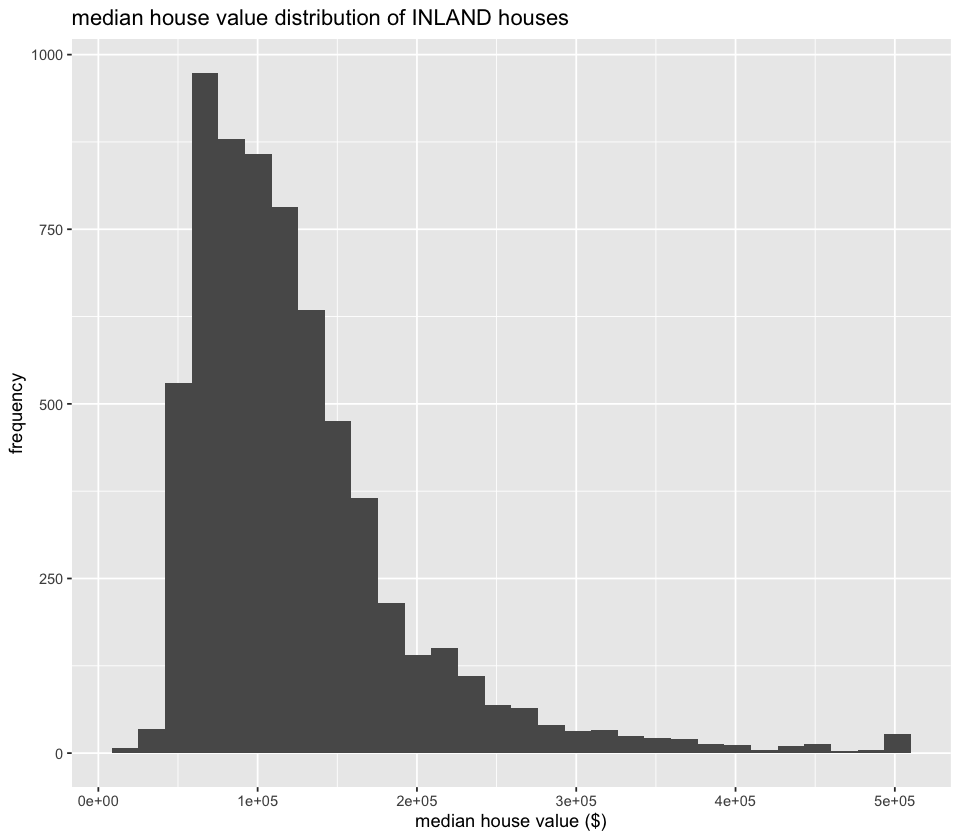

In [208]:
ggplot(ocean, aes(x=median_house_value)) + 
    geom_histogram(bins=30) + 
    labs(x="median house value ($)", y="frequency", title="median house value distribution of <1H OCEAN houses")

ggplot(inland, aes(x=median_house_value)) + 
    geom_histogram(bins=30) +
    labs(x="median house value ($)", y="frequency", title="median house value distribution of INLAND houses")


#### Fig. 4 (Above) median house value distribution of <1H OCEAN houses

#### Fig. 5 (Below) median house value distribution of INLAND houses

First, from the plot above, we can see that the distribution of <1H OCEAN houses are roughly normally distributed but bimodal with a peak at around 100,000 dollars and another at 500,000 USD. However, the distribution of INLAND houses are skewed to the right with a peak at 100,100 dollars. 
Since the sample is not normally distributed, let's use the central limit theorem and take many samples of the same size without replacement. This method will allow us to use formulae for normal distributions such as the two-sample independent t-test.


In [209]:
# Take 500 samples of size 100 from both classes

sample_ocean <- housing_filtered %>%
    filter(ocean_proximity == "<1H OCEAN") %>%
    rep_sample_n(size = 100, rep = 100, replace = FALSE) %>%
    group_by(replicate) %>% 
    summarise(sample_mean = mean(median_house_value), 
              sample_median = median(median_house_value),
              sample_sd = sd(median_house_value),
              IQR = IQR(median_house_value),
              name = "ocean sample", n=n()) %>% 
    select(-replicate)
# Take 500 samples of size 100 from both classes
sample_inland <- housing_filtered %>%
    filter(ocean_proximity == "INLAND") %>%
    rep_sample_n(size = 100, rep = 100, replace = FALSE) %>%
    group_by(replicate) %>% 
    summarise(sample_mean = mean(median_house_value), 
              sample_median = median(median_house_value),
              sample_sd = sd(median_house_value),
              IQR = IQR(median_house_value),
              name = "inland sample", n=n()) %>% 
    select(-replicate)

head(sample_ocean)
head(sample_inland)


sample_mean,sample_median,sample_sd,IQR,name,n
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
230554.0,213700,85960.04,99800,ocean sample,100
262012.1,230450,114130.31,167025,ocean sample,100
251505.1,220500,108565.85,141025,ocean sample,100
241335.1,208800,103138.41,115325,ocean sample,100
236336.0,210750,105525.95,107725,ocean sample,100
233501.0,219950,98027.09,104300,ocean sample,100


sample_mean,sample_median,sample_sd,IQR,name,n
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
135255,116050,86323.25,83350,inland sample,100
117160,96650,71215.91,62275,inland sample,100
139441,120700,95656.67,94300,inland sample,100
114393,100050,48265.51,58725,inland sample,100
134207,122450,77907.89,74775,inland sample,100
115253,97950,60983.31,58600,inland sample,100


#### Fig. 6 Ocean Sample (Above), Inland Sample (Below)

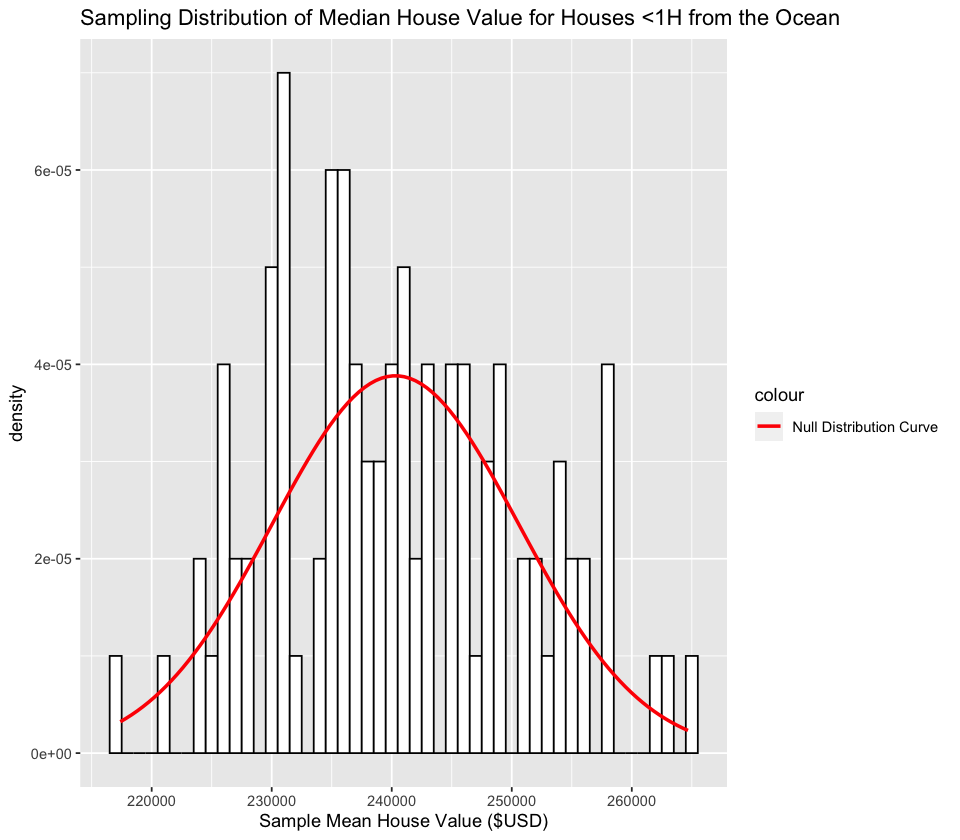

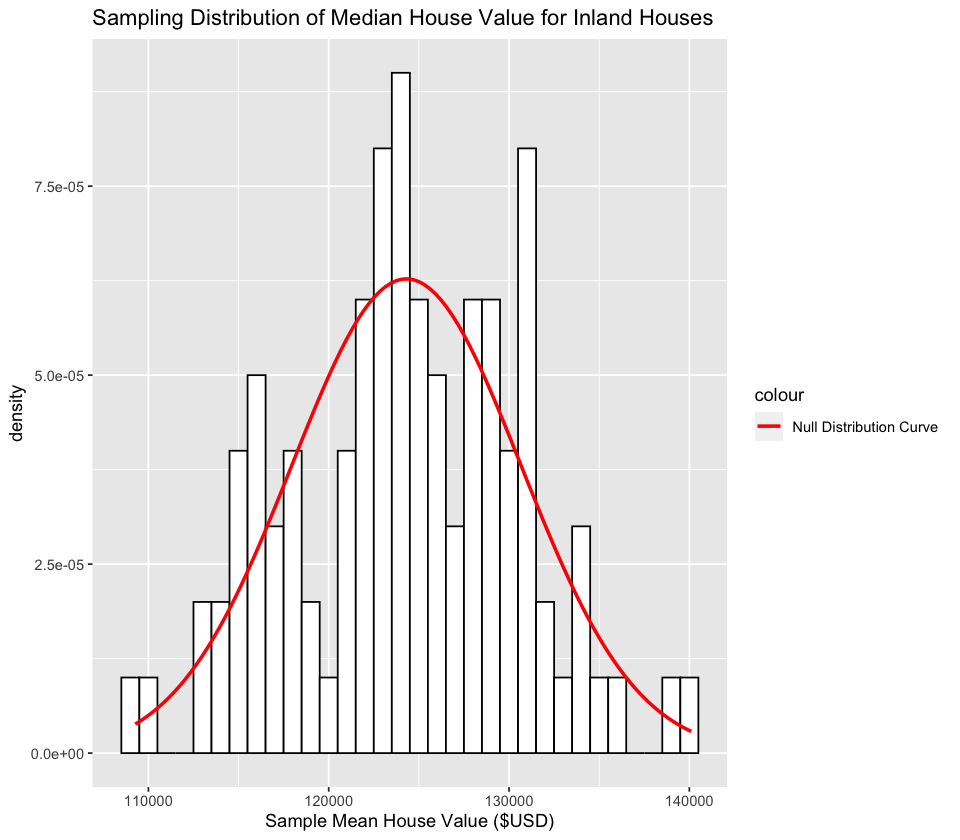

In [210]:
# Plot histograms with ND curve
options(repr.plot.width = 8, repr.plot.height = 7)

ocean_norm_dist <- sample_ocean %>%
    ggplot(aes(x = sample_mean)) +
    geom_histogram(aes(y = ..density..), binwidth = 1000, color = "black", fill = "white") +
    stat_function(fun = dnorm, args = list(mean = mean(sample_ocean$sample_mean), 
                                           sd = sd(sample_ocean$sample_mean)),
                  aes(color = "Null Distribution Curve"), size = 1) +
    scale_color_manual(values = "red") +
    ggtitle("Sampling Distribution of Median House Value for Houses <1H from the Ocean") +
    xlab("Sample Mean House Value ($USD)")

inland_norm_dist <- sample_inland %>%
    ggplot(aes(x = sample_mean)) +
    geom_histogram(aes(y = ..density..), binwidth = 1000, color = "black", fill = "white") +
    stat_function(fun = dnorm, args = list(mean = mean(sample_inland$sample_mean), 
                                           sd = sd(sample_inland$sample_mean)),
                  aes(color = "Null Distribution Curve"), size = 1) +
    scale_color_manual(values = "red") +
    ggtitle("Sampling Distribution of Median House Value for Inland Houses") +
    xlab("Sample Mean House Value ($USD)")

ocean_norm_dist
inland_norm_dist

#### Fig. 7 (Above) Sampling Distribution of Median House Value for Houses <1H from the Ocean

#### Fig. 8 (Below) Sampling Distribution of Median House Value for Inland Houses

Now that looks a lot more normally distributed. We can also see that the graph roughly follows the null distribution curve (red line). 

In [211]:
samples <- sample_ocean %>%
    rbind(sample_inland)
samples_summary_stats <- samples %>%
    group_by(name) %>% 
    summarise(sampling_dist_mean = mean(sample_mean), 
          sampling_dist_std_error = sd(sample_mean)/sqrt(n()),
          sampling_dist_sd=sd(sample_mean), 
          n = n()) %>% 
    arrange(desc(name)) # so we can have ocean sample come first for future calculations
samples_summary_stats


name,sampling_dist_mean,sampling_dist_std_error,sampling_dist_sd,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
ocean sample,240307.5,1027.5441,10275.441,100
inland sample,124308.7,635.8681,6358.681,100


#### Fig. 9 Sampling Distribution Summary

From the summaries above, we can see that the mean of the `sample_ocean` (240063.2) is higher than the mean of the `sample_inland` (125271.6). It's also interesting that the variance of the ocean sample is much higher than that of inalnd. Let's perform a two-sample t-test and a confidence interval.

### Finding the estimate

In [212]:
obs_mean_diff <- 
    housing_filtered %>% 
    filter(ocean_proximity %in% c("<1H OCEAN", "INLAND")) %>%
    group_by(ocean_proximity) %>% 
    summarise(mean = mean(median_house_value))
    # pivot_wider(names_from = ocean_proximity, values_from = median_house_value) 
    # transmute(diff = less1H_OCEAN - INLAND) %>%
    # pull(diff)
obs_mean_diff<- obs_mean_diff$mean[1]-obs_mean_diff$mean[2]
obs_mean_diff

[1] 115278.9

### Finding the test statistic
To answer this question, we will test the following hypotheses:
$$H_0: \mu_{\text{Ocean}} - \mu_{\text{Inland}} = 0$$ $$H_1: \mu_{\text{Ocean}} - \mu_{\text{Inland}} \neq 0$$
using the following test statistic:

$$ T = \frac{\bar{x}_{\text{Ocean}} - \bar{x}_{\text{Inland}}}{\sqrt{\frac{s^2_{\text{Ocean}}}{n_1}+\frac{s^2_{\text{Inland}}}{n_2}}} $$ where $\bar{x}_{\text{Ocean}}$ and $\bar{x}_{\text{Inland}}$ are the sample means of median house value for <1H OCEAN and INLAND houses, respectively; $s^2_{\text{Ocean}}$ and $s^2_{\text{Inland}}$ are the sample variances for <1H OCEAN and INLAND houses, respectively; and $n_1$ and $n_2$ are the sample size for <1H OCEAN and INLAND houses, respectively.

In [252]:
# find test statistic 
ocean_mean <- samples_summary_stats$sampling_dist_mean[1]
ocean_var <- samples_summary_stats$sampling_dist_sd[1]^2
inland_mean <- samples_summary_stats$sampling_dist_mean[2]
inland_var <- samples_summary_stats$sampling_dist_sd[2]^2
n <- samples_summary_stats$n[1]

housing_test_stat_num <- (ocean_mean - inland_mean)
housing_test_stat_den <- sqrt((ocean_var + inland_var) / n)
housing_test_stat <- housing_test_stat_num/housing_test_stat_den
housing_test_stat

[1] 90.0141

As expected the houses closer to ocean has a higher sample average house value than inland houses. Our test statistic is 204.6, which is extremely high. Let's see if our observed difference is statistically significant.  

Now, if $H_0$ is true, i.e., if $\mu_{\text{Ocean}} = \mu_{\text{Inland}}$, the $T$ statistic follows a $t$ distribution with approximately
$$
\nu = \frac{
    \left(\frac{s_{Ocean}^2}{n_1}+\frac{s_{Inland}^2}{n_2}\right)^2
}
{
\frac{s_{Ocean}^4}{n_1^2(n_1-1)}+\frac{s_{Inland}^4}{n_2^2(n_2-1)}
}
$$
degrees of freedom.

In [253]:
# find v 

v_num = ((ocean_var + inland_var/n)/n)^2
v_den = ((ocean_var^2 + inland_var^2)/((n^2)*(n-1)))
v = v_num / v_den
v

[1] 81.8117

In [254]:
# find the null distribution and compare to current distribution
samples_summary_stats <-
    samples_summary_stats %>% 
    mutate(null_std_error = sqrt(ocean_var/samples_summary_stats$n[1] + inland_var/n))

samples_t_test <-
    tidy(
        t.test(x = samples%>%filter(name=="ocean sample")%>%select(sample_mean),
               y = samples%>%filter(name=="inland sample")%>%select(sample_mean),
               alternative = "greater", conf.level=0.95))

# null_dist <- rt(samples_summary_stats$n[1], df = df)

# # plot the null and current observed distributions

obs_null_dist <- ggplot() +
    geom_density(aes(x = null_dist), color = "blue", alpha = 0.6) +
    geom_vline(xintercept = 0, color = "black", linetype = "dashed") +
    geom_vline(xintercept = housing_test_stat, color = "black", linetype = "solid") +
    labs(x = "Test Statistic", title = "Observed and Null Distributions") 

# obs_null_dist
samples_t_test
samples_summary_stats
# obs_null_dist

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
115766.5,240226,124459.5,90.0141,5.641494e-149,175.2899,113639.9,Inf,Welch Two Sample t-test,greater


name,sampling_dist_mean,sampling_dist_std_error,sampling_dist_sd,n,null_std_error
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
ocean sample,240226.0,1060.5169,10605.169,100,1286.094
inland sample,124459.5,727.5579,7275.579,100,1286.094


We notice that the pvalue is much less than 0 but we will analyse it furhter using different methods.

In [255]:
# confidence interval at 5% confidence level 

housing_ci <- 
    tibble(lower_ci = (ocean_mean - inland_mean - qnorm(0.975) * sqrt(ocean_var + inland_var)),
           upper_ci = (ocean_mean - inland_mean + qnorm(0.975) * sqrt(ocean_var + inland_var)))
housing_ci


lower_ci,upper_ci
<dbl>,<dbl>
90559.58,140973.5


### Simulating the Null distribution

In [217]:
head(housing_filtered)

median_house_value,ocean_proximity
<dbl>,<chr>
431000,<1H OCEAN
217000,<1H OCEAN
247600,<1H OCEAN
283500,<1H OCEAN
216900,<1H OCEAN
282500,<1H OCEAN


In [218]:
null_model_trees <- 
    housing_filtered %>% 
    specify(formula = median_house_value ~ ocean_proximity) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 5000, type = "permute") %>% 
    calculate(stat="diff in means", order = c("<1H OCEAN", "INLAND"))
head(null_model_trees)

replicate,stat
<int>,<dbl>
1,-903.6901
2,1706.2028
3,796.1155
4,1807.8982
5,-1058.0718
6,-1041.2698


### Result of Hypothesis test

Warning message in min(diff(unique_loc)):
"no non-missing arguments to min; returning Inf"


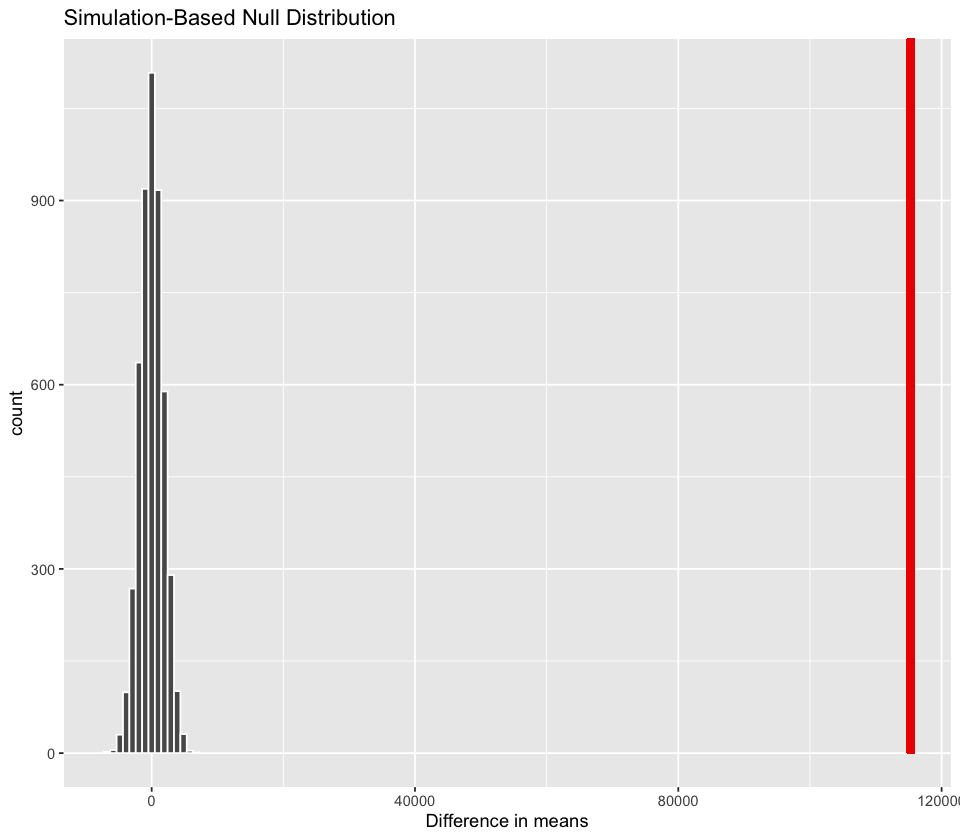

In [219]:
houses_result_plot <- 
    null_model_trees %>%
    visualize() + 
    shade_p_value(obs_stat = obs_mean_diff, direction = "right") +
    xlab("Difference in means")
houses_result_plot

#### Fig. 10 Simulation Based Null Distribution of Difference in Means

In [220]:

value=null_model_trees %>% 
    get_p_value(obs_stat = obs_mean_diff, direction = "right")
value

Warning message:
"Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information."


p_value
<dbl>
0


We notice that we obtain a p-value of zero from get_p_vlaue() this suggests that the p value is much smaller than zero. hence since ht epvalue is smaller than our alpha 0.05 we conclude that we reject the nuill hypothesis at a 5% significance level. 


### Simulating the Null distribution using bootstrap

In [221]:
null_model_houses_bootstrap <- 
    housing_filtered %>% 
    specify(formula = median_house_value ~ ocean_proximity) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 5000, type = "bootstrap") %>% 
    calculate(stat="diff in means", order = c("<1H OCEAN", "INLAND"))
head(null_model_houses_bootstrap)
null_model_houses_bootstrap%>% get_ci()

replicate,stat
<int>,<dbl>
1,115701.3
2,116488.1
3,114846.4
4,112788.4
5,114794.7
6,114617.8


lower_ci,upper_ci
<dbl>,<dbl>
112497.9,117991.2


### Result of Hypothesis test using bootstrap

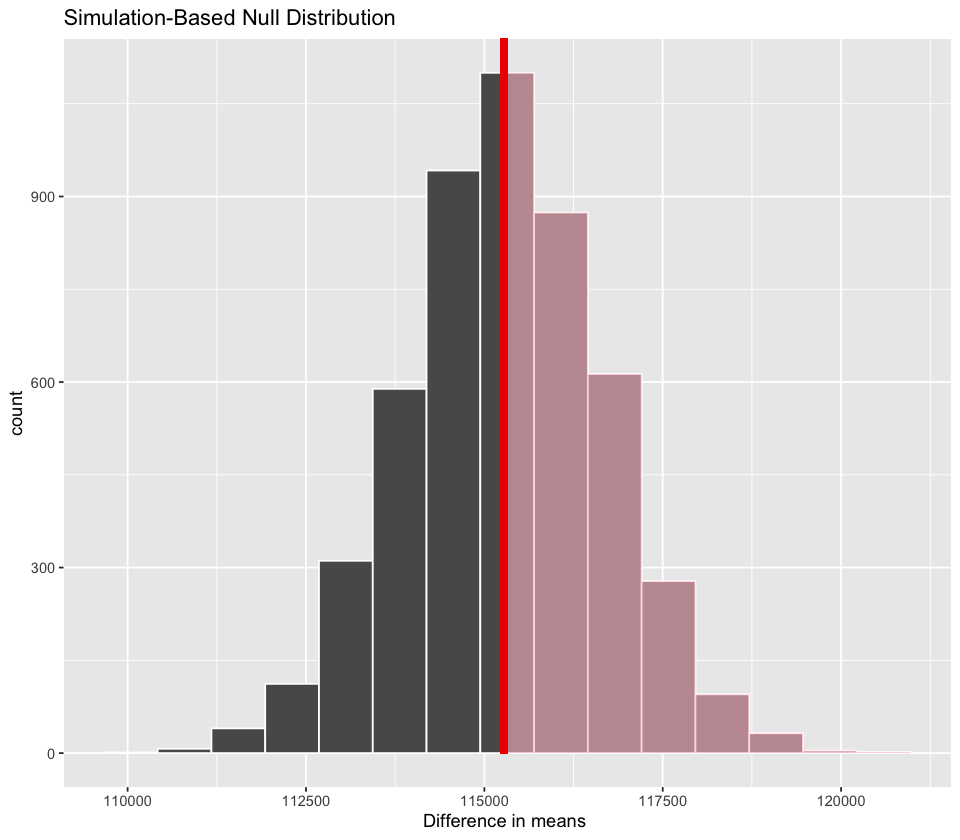

In [222]:
houses_result_bootstrap_plot <- 
    null_model_houses_bootstrap %>%
    visualize() + 
    shade_p_value(obs_stat = obs_mean_diff, direction = "right") +
    xlab("Difference in means ")
houses_result_bootstrap_plot

#### Fig. 11 Simulation Based Null Distribution of Difference in Means using bootstrap

In [223]:
value=null_model_houses_bootstrap %>% 
    get_p_value(obs_stat = obs_mean_diff, direction = "right")
value

p_value
<dbl>
0.4992


## Methods
We are working with data from a reputable source; the raw data originally came from the 1990 California census, and this dataset was initially developed by Pace and Berry for their 1997 paper titled “Sparse Spatial Autoregressions”.[7] The dataset has since been co-opted by many data scientists and students, thanks to its clarity and utility.

Our data cleaning and wrangling processes are clearly elucidated, contributing to the reproducibility of our results. Potential stakeholders will be able to easily understand the findings of our analysis from the plot and estimates presented. 

We expect to find that the median house prices in ocean proximity are higher than the median house price inland. Despite the boxplots, the analysis does not address how confident we are that we can reject the null hypothesis. To address this gap, we will utilize hypothesis testing and perform a two-sample t-test to construct a confidence interval and obtain the range containing the true difference in median housing prices. We will also perform a repeat bootstrap analysis, and compare the results to the confidence interval.

To give a brief explanation of the steps, we first built out a few preliminary plots showing that indeed, our initial hypothesis seems correct because inland houses have a lower median house value than the other types which are closer to the ocean, bay, or are located on an island. In order to achieve a more accurate result, we focussed on “<1H OCEAN” and “INLAND” due to their high number of observations which also aligns with our desired null and alternative hypothesis.

After exploring and tidying our data, we took 500 samples of size 100 from the ocean_proximity classes “<1H OCEAN” and “INLAND”, and calculated relevant summary statistics. We proceeded to visualize the sampling distributions by plotting the histograms with the null distribution superimposed, which helped us gauge how normally distributed they are. We observed from the summary statistics that had unequal means and standard deviations in the sampling distributions, and we thus decided to perform a two-sample t-test. 

We then calculated the observed difference in means and the test statistic, which were 115278.8935 and 95.8664, respectively. In order to determine whether the observed difference was statistically significant, we found the null distribution and compared it to the current distribution, and conducted the t-test. We proceeded to construct a confidence interval at a 5% significance level. We simulated the null distribution to visualize the results of our t-test and calculated the p-value.

Overall, we believe that asymptotics was more appropriate in this situation. Although we tried both 

We feel that asymptotic methods were better suited to our dataset. This was mainly because we have access to a large sample size and we used the Central Limit Theorem in order to arrive at our results. It is also quicker to compute and works in this case when the population distribution is unknown or not normally distributed. On the other hand, bootstrapping involves quite a lot of resampling from the original data and it is computationally intensive. 


## Discussion

Overall, we found that there was indeed a difference between the average median values of homes inland compared to those within a one hour commute to the ocean. This aligned with our initial expectations, based on past trends in California real estate value and home-buying behaviours.

Most of the currently available data regarding the relationship between ocean proximity and property value in California has focused on homes situated on or near the immediate coastline.[1] Research has shown that the effects of sea level rise will extend inland beyond the coastal region, and implores policy makers to start planning more aggressively.[2,3,4,?] By using data from the 1990 census in our analysis, we hope to provide a point of reference for future study that encompasses homes outside of the traditional coastal region that still stand to be affected by the impending ecological disruption.

We can further develop the analysis by examining the impact of alternative metrics on median home prices, and perform similar analyses on more recent data. The data we are currently using is somewhat dated and the real estate industry has changed drastically since then. It may be that the gap in average median house value between houses by the coast and houses further inland has widened since 1990. 

Our report has utility independent from the growing market disruption due to California’s changing coastline. In addition, future research could explore other factors that impact the value of houses, such as local amenities, school quality, crime rates, and demographic trends. One factor that is already becoming increasingly important in the determination of home values in California is the ecological stability of the land houses are built on. By understanding how these factors interact with proximity to the ocean, researchers could gain a more nuanced understanding of what drives home prices in coastal communities. Additionally, research could be conducted to determine whether the relationship between proximity to the ocean and home prices is consistent across different regions and housing markets, or if there are variations based on factors such as climate, geography, and cultural preferences. Moreover, with environmental data, we could also look at the impact of environmental factors, such as sea level rise and coastal erosion on the value of homes near the ocean.

## References (APA)

[1] Anderson, R. B. (2022). The taboo of retreat: The politics of sea level rise, managed retreat, and coastal property values in California. Economic Anthropology. https://doi.org/10.1002/sea2.12247<br>
<br>
[2] What Threat Does Sea-Level Rise Pose to California? (2020). Lao.ca.gov. Retrieved March 15, 2023, from https://lao.ca.gov/Publications/Report/4261#California_Will_Experience_Rising_Seas_and_Tides<br>
<br>
[3] Barnard, P. L., Erikson, L. H., Foxgrover, A. C., Hart, J. A. F., Limber, P., O’Neill, A. C., van Ormondt, M., Vitousek, S., Wood, N., Hayden, M. K., & Jones, J. M. (2019). Dynamic flood modeling essential to assess the coastal impacts of climate change. Scientific Reports, 9(1). https://doi.org/10.1038/s41598-019-40742-z<br>
<br>
[4] Griggs, G., Davar, L., & Reguero, B. G. (2019). Documenting a Century of Coastline Change along Central California and Associated Challenges: From the Qualitative to the Quantitative. Water, 11(12), 2648. https://doi.org/10.3390/w11122648<br>
<br>
[5] Nugent, C. California Housing Prices. (2017, November 24). Kaggle. https://www.kaggle.com/datasets/camnugent/california-housing-prices<br>
<br>
[6] Géron, A. (2017). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. O’Reilly Online Learning. Retrieved from: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/<br>
<br>
[7] Pace, R. K., & Barry, R. P. (1997). Sparse spatial autoregressions. Statistics & Probability Letters, 33(3), 291–297. Retrieved from: https://doi.org/10.1016/s0167-7152(96)00140-x<br>
<br>
[8] State of California Sea-Level Rise Guidance 2018 Update. (2018). Retrieved March 16, 2023, from https://opc.ca.gov/webmaster/ftp/pdf/agenda_items/20180314/Item3_Exhibit-A_OPC_SLR_Guidance-rd3.pdf